In [ ]:
!pip install ktrain

In [1]:
import sys
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
import math
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import ktrain

In [2]:
!git clone https://github.com/aviadar/covid19 proj

Cloning into 'proj'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 157 (delta 87), reused 115 (delta 45), pack-reused 0
Receiving objects: 100% (157/157), 1.52 MiB | 25.44 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [3]:
sys.path.insert(0,'/content/proj')

from utilities.sentence_utility import SentenceUtil

In [4]:
from google.colab import drive
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
covid_df = pickle.load(open( "/content/drive/MyDrive/AdvancedML/HW3/covid_df.p", "rb" ) )
covid_df

,title,cord_uid,abstract,body,processed_body,processed_abstract
0,Blockchain-based governance models for COVID-1...,ppfxi5id,This paper analyses the requirements of a bloc...,"Within the existing literature, papers both ad...","Within existing literature , papers advocate c...",This paper analyses requirements blockchain-ba...
1,On intelligent agent-based simulation of COVID...,uyf9ds7s,COVID-19 has impacted all areas of human activ...,"Over the past decades, significant changes hav...","Over past decades , significant changes occurr...",COVID-19 impacted areas human activity around ...
2,Concern with COVID-19 pandemic threat and atti...,d0s0f0t1,Tightening social norms is thought to be adapt...,Tightening social norms is thought to be adapt...,Tightening social norms thought adaptive deali...,Tightening social norms thought adaptive deali...
3,An antifragile strategy for Rome post-Covid mo...,ct7nc16b,We are aware that we will have to live with CO...,"Since exactly one year, COVID has changed our ...","Since exactly one year , COVID changed way liv...",We aware live COVID-19 least vaccination minim...
4,COVID-19 Time Series Forecasting – Twenty Days...,bs206r15,"The new Coronavirus, responsible for the COVID...",One of the most issues addressed in 2020 and 2...,One issues addressed 2020 2021 prevention cont...,"The new Coronavirus , responsible COVID-19 dis..."
...,...,...,...,...,...,...
19995,Patient and Provider Experience With Cystic Fi...,l1y1ezfo,In response to the novel coronavirus (COVID-19...,"On March 11, 2020 the novel coronavirus diseas...","On March 11 , 2020 novel coronavirus disease (...",In response novel coronavirus ( COVID-19 ) pan...
19996,Association between voriconazole exposure and ...,lccgk110,Therapeutic drug monitoring (TDM) is essential...,Therapeutic drug monitoring (TDM) is essential...,Therapeutic drug monitoring ( TDM ) essential ...,Therapeutic drug monitoring ( TDM ) essential ...
19997,Network Pharmacology-Based Analysis of Pogoste...,8ehcnyp5,Nonalcoholic fatty liver disease (NAFLD) is th...,Nonalcoholic fatty liver disease (NAFLD) is a ...,Nonalcoholic fatty liver disease ( NAFLD ) cru...,Nonalcoholic fatty liver disease ( NAFLD ) com...
19998,A Novel Approach to the Viability Determinatio...,htzqgwp6,Mycobacterium avium subsp. paratuberculosis (M...,Mycobacterium avium subsp. paratuberculosis (M...,Mycobacterium avium subsp . paratuberculosis (...,Mycobacterium avium subsp . paratuberculosis (...


In [7]:
sentence_util = SentenceUtil(covid_df.abstract, module_url="https://tfhub.dev/google/universal-sentence-encoder/4")

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


100%|██████████| 19999/19999 [01:46<00:00, 187.15it/s]


we'll calculated the best K for K Means using the elbow method.

In [8]:
Sum_of_squared_distances = []
K = range(2,20)
for k in tqdm(K):
    km = KMeans(n_clusters=k, random_state=0).fit(sentence_util.embedding)
    Sum_of_squared_distances.append(km.inertia_)

100%|██████████| 18/18 [02:30<00:00,  8.37s/it]


Text(0.5, 1.0, 'Elbow Method For Optimal k')

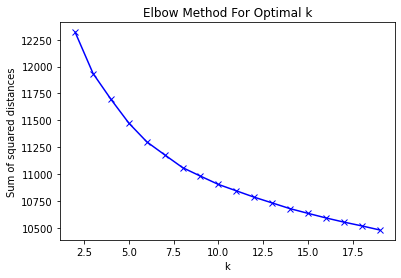

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

Looks like we get the elbow at about K=8.

In [22]:
k_clusters = 8
covid_df['cluster'] = KMeans(n_clusters=k_clusters, random_state=0).fit(sentence_util.embedding).labels_
covid_df

,title,cord_uid,abstract,body,processed_body,processed_abstract,cluster
0,Blockchain-based governance models for COVID-1...,ppfxi5id,This paper analyses the requirements of a bloc...,"Within the existing literature, papers both ad...","Within existing literature , papers advocate c...",This paper analyses requirements blockchain-ba...,4
1,On intelligent agent-based simulation of COVID...,uyf9ds7s,COVID-19 has impacted all areas of human activ...,"Over the past decades, significant changes hav...","Over past decades , significant changes occurr...",COVID-19 impacted areas human activity around ...,6
2,Concern with COVID-19 pandemic threat and atti...,d0s0f0t1,Tightening social norms is thought to be adapt...,Tightening social norms is thought to be adapt...,Tightening social norms thought adaptive deali...,Tightening social norms thought adaptive deali...,5
3,An antifragile strategy for Rome post-Covid mo...,ct7nc16b,We are aware that we will have to live with CO...,"Since exactly one year, COVID has changed our ...","Since exactly one year , COVID changed way liv...",We aware live COVID-19 least vaccination minim...,6
4,COVID-19 Time Series Forecasting – Twenty Days...,bs206r15,"The new Coronavirus, responsible for the COVID...",One of the most issues addressed in 2020 and 2...,One issues addressed 2020 2021 prevention cont...,"The new Coronavirus , responsible COVID-19 dis...",3
...,...,...,...,...,...,...,...
19995,Patient and Provider Experience With Cystic Fi...,l1y1ezfo,In response to the novel coronavirus (COVID-19...,"On March 11, 2020 the novel coronavirus diseas...","On March 11 , 2020 novel coronavirus disease (...",In response novel coronavirus ( COVID-19 ) pan...,4
19996,Association between voriconazole exposure and ...,lccgk110,Therapeutic drug monitoring (TDM) is essential...,Therapeutic drug monitoring (TDM) is essential...,Therapeutic drug monitoring ( TDM ) essential ...,Therapeutic drug monitoring ( TDM ) essential ...,1
19997,Network Pharmacology-Based Analysis of Pogoste...,8ehcnyp5,Nonalcoholic fatty liver disease (NAFLD) is th...,Nonalcoholic fatty liver disease (NAFLD) is a ...,Nonalcoholic fatty liver disease ( NAFLD ) cru...,Nonalcoholic fatty liver disease ( NAFLD ) com...,0
19998,A Novel Approach to the Viability Determinatio...,htzqgwp6,Mycobacterium avium subsp. paratuberculosis (M...,Mycobacterium avium subsp. paratuberculosis (M...,Mycobacterium avium subsp . paratuberculosis (...,Mycobacterium avium subsp . paratuberculosis (...,0


In [23]:
sentence_util.cluster_sentences(k_clusters=k_clusters)

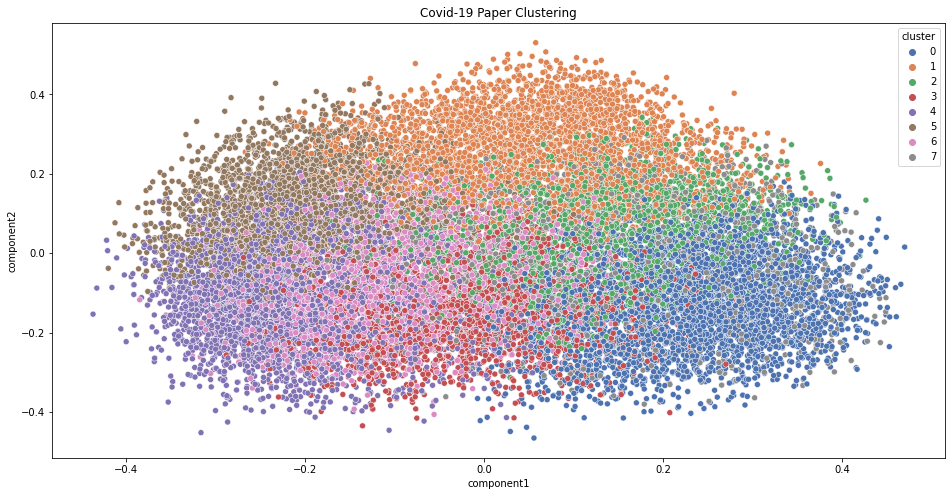

In [26]:
f, ax = plt.subplots(figsize=(16, 8))
plt.title('Covid-19 Paper Clustering')
sentence_util.plot_clusters()

In [56]:
stpwrd = nltk.corpus.stopwords.words('english')
new_stopwords = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'CoV', 'COVID', 'SARS']
stpwrd.extend(new_stopwords)

def remove_stop_words(txt):
    text_tokens = word_tokenize(txt)
    tokens = [words for words in text_tokens if not words in stpwrd]
    return " ".join([i for i in tokens])

In [63]:
def plot_cluster_word_cloud(df, k):
    for i in range(k):
        words = "".join(df[df.cluster==i].processed_abstract) 
        words = remove_stop_words(words)
        plt.subplot(2, int(math.ceil(k/2)), i+1)
        # plt.imshow(WordCloud(width=1000, height=400, stopwords=STOPWORDS, background_color='white').generate(words), interpolation="bilinear")
        plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white').generate(words), interpolation="bilinear")
        plt.axis('off')
        plt.title('cluster ' + str(i))

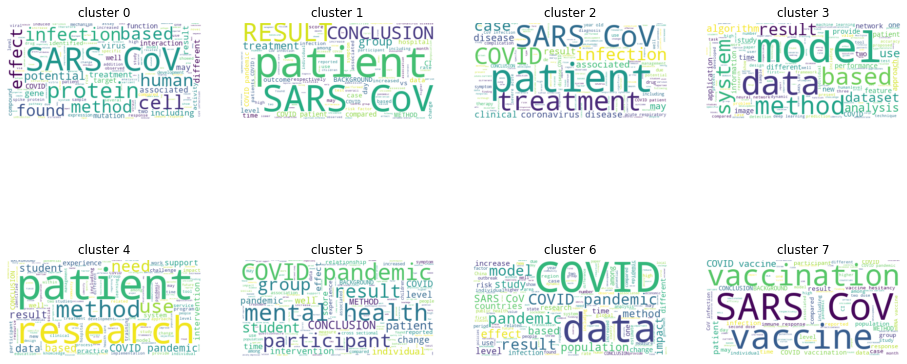

In [64]:
f, ax = plt.subplots(figsize=(16, 8))
plot_cluster_word_cloud(covid_df, k_clusters)

using LDA for topic modeling

In [78]:
ktrain.text.preprocessor.detect_lang = ktrain.text.textutils.detect_lang
tm = []
for i in range(k_clusters):
    tm.append(ktrain.text.get_topic_model(covid_df[covid_df.cluster==i].processed_abstract, n_topics=10, n_features=10000))

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
lang: en
preprocessing te

In [79]:
for i in range(k_clusters):
    print('')
    print('Topics for Cluster ' + str(i) + ':')
    tm[i].print_topics()


Topics for Cluster 0:
topic 0 | resistance infections bacterial antimicrobial pathogens resistant antibiotic antibiotics bacteria pathogen
topic 1 | sars-cov-2 viral protein infection virus covid-19 proteins human host binding
topic 2 | samples study analysis results gene supplementary rna genes information available
topic 3 | enzymes orf6 glycocalyx consuming nad n-glycans proteins proteoglycans shield horseshoe
topic 4 | metabolic metabolism mitochondrial hiv liver brain lipid stress glucose hiv-1
topic 5 | dna autophagy modification methylation maternal quercetin proteins dengue allosteric myricetin
topic 6 | activity compounds properties potential study drug applications review different showed
topic 7 | sars-cov-2 variants spike mutations variant antibodies omicron detection antibody covid-19
topic 8 | fold curcumin nlrp3 inflammasome lungs activation infections surfactant increase reduced
topic 9 | cells cell expression immune patients mice levels cancer response inflammatory

T